<a href="https://colab.research.google.com/github/emelyck/Metodos_DynnaRangel_SamuelRomero/blob/main/tarea_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#punto 7
import numpy as np
R = 1
n = 100
h = 2 * R / n

def semiesfera(x, y, R):
    formula = R**2 - x**2 - y**2
    if formula >= 0:
        return np.sqrt(formula)
    else:
        return 0
parametro_x = np.linspace(-R, R, n + 1)
parametro_y = np.linspace(-R, R, n + 1)

volumen = 0
for o in range(n):
    for u in range(n):
        xo, yu = parametro_x[o], parametro_y[u]
        xo1, yu1 = parametro_x[o+1], parametro_y[u+1]
        f1 = semiesfera(xo, yu, R)
        f2 = semiesfera(xo1, yu, R)
        f3 = semiesfera(xo, yu1, R)
        f4 = semiesfera(xo1, yu1, R)

        area = h * h
        promedio = (f1 + f2 + f3 + f4) / 4
        volumen += promedio * area

print(volumen)




2.0938469983337344


In [6]:
#punto 15
import numpy as np

# Función para calcular los polinomios de Legendre
def lege(n, x):
    if n == 0:
        return np.ones_like(x)
    elif n == 1:
        return x
    else:
        P = np.ones_like(x)
        P_1 = x
        for o in range(2, n + 1):
            Ps = ((2 * o - 1) * x * P_1 - (o - 1) * P) / o
            P = P_1
            P_1 = Ps
        return Ps
def derivada_legendre(n, x):
    Ps = lege(n, x)
    Ps_1_menos = lege(n - 1, x)
    return n * (x * Ps - Ps_1_menos) / (x**2 - 1)

def ceros(n, tol=1e-14):
    x = np.cos(np.pi * (np.arange(1, n + 1) - 0.25) / (n + 0.5))
    for _ in range(100):
        Ps = lege(n, x)
        Ps_p = derivada_legendre(n, x)
        diferencia_x = -Ps / Ps_p
        x += diferencia_x
        if np.max(np.abs(diferencia_x)) < tol:
            break
    return x

def pesos(n, x):
    Ps_p = derivada_legendre(n, x)
    return 2 / ((1 - x**2) * Ps_p**2)
n = 20
xk = ceros(n)
wk = pesos(n, xk)

print("Ceros:")
print(xk)
print("\nPesos:")
print(wk)


Ceros:
[ 0.9931286   0.96397193  0.91223443  0.83911697  0.74633191  0.63605368
  0.510867    0.37370609  0.22778585  0.07652652 -0.07652652 -0.22778585
 -0.37370609 -0.510867   -0.63605368 -0.74633191 -0.83911697 -0.91223443
 -0.96397193 -0.9931286 ]

Pesos:
[0.01761401 0.04060143 0.06267205 0.08327674 0.10193012 0.11819453
 0.13168864 0.14209611 0.14917299 0.15275339 0.15275339 0.14917299
 0.14209611 0.13168864 0.11819453 0.10193012 0.08327674 0.06267205
 0.04060143 0.01761401]


In [7]:
#punto 16
import numpy as np

def inte(x):
    return 1 / (x**4 + 1)
def funcion(f, a, b, n):
    h = (b - a) / n
    integral = 0.5 * (f(a) + f(b))
    for o in range(1, n):
        integral += f(a + o * h)
    return integral * h

a_0, b_0 = 1, 100
n_0 = 1000
integral_0 = funcion(inte, a_0, b_0, n_0)
n_00 = 1000
a_00, b_00 = 0, 1
integral_00 = funcion(inte, a_00, b_00, n_00)
resultado = integral_0 + integral_00
print(f"integral: {resultado}")

integral: 1.1115378682487933


Integral: 0.29740996744360887
Valor real: 6.493939402266828


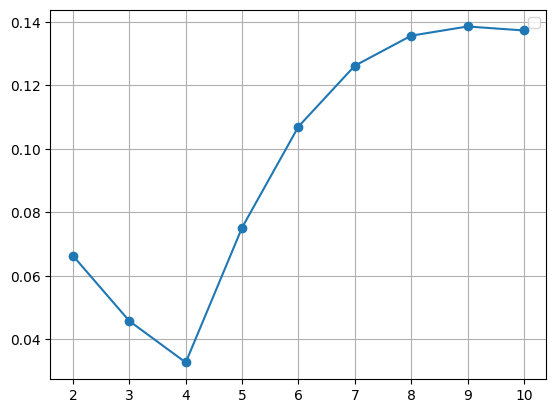

In [8]:
#punto 17
import numpy as np
import matplotlib.pyplot as plt

def polinomio(n, x):
    if n == 0:
        return 1
    elif n == 1:
        return 1 - x
    else:
        jk = 1
        kj = 1 - x
        for o in range(2, n + 1):
            re = ((2 * o - 1 - x) * kj - (o - 1) * jk) / o
            jk = kj
            kj = re
        return kj
def derivada(n, x):
    h = 1e-6
    return (polinomio(n, x + h) - polinomio(n, x - h)) / (2 * h)
def calc(n, x0, tol=1e-14, max_iter=100):
    x = x0
    for i in range(max_iter):
        fx = polinomio(n, x)
        dfx = derivada(n, x)
        if abs(fx) < tol:
            return x
        x = x - fx / dfx
    return x
def buscar(n):
    guarda = []
    for o in range(1, n + 1):
        x0 = (2 * o - 1) / (2 * n)
        root = calc(n, x0)
        guarda.append(root)
    return np.array(guarda)
def pesos(n, guarda):
    w = []
    for root in guarda:
        L_n_plus_1 = polinomio(n + 1, root)
        weight = root / (n + 1)**2 / (L_n_plus_1**2)
        w.append(weight)
    return np.array(w)
def integracion(x):
    return (x**3) / (np.exp(x) - 1)
def gauss(n):
    guarda = buscar(n)
    w = pesos(n, guarda)
    integral = sum(w * integracion(guarda))
    return integral
valor_real = (np.pi**4) / 15
n = 3
resultado = gauss(n)
print(f"Integral: {resultado}")
print(f"Valor real: {valor_real}")

valores = np.arange(2, 11)
e = []

for n in valores:
    estamacion = gauss(n)
    e_r = estamacion / valor_real
    e.append(e_r)
plt.plot(valores, e, 'o-')
plt.grid(True)
plt.legend()
plt.show()

In [11]:
#punto 9 y 10

import sympy as sp
x = sp.symbols('x')
f = sp.Function('f')(x)
a, b = 0, 1
h = (b - a) / n
n = 3
x_val = [a + o * h for o in range(n + 1)]
inte = (3 * h / 8) * (f.subs(x, x_val[0]) + 3 * sum(f.subs(x, xi) for xi in x_val[1:-1]) + f.subs(x, x_val[-1]))
inte_sim = sp.simplify(inte)
puntos = [(2 * a + b) / 3, (a + 2 * b) / 3]
deriva = sp.diff(f, x, 4)
xi = sp.symbols('xi')
e = - (deriva.subs(x, xi) * (b - a)**5) / (80)
e_s = sp.simplify(e)
print(f"Integral: {inte_sim}")
print(f"puntos: {puntos[0]}, {puntos[1]}")
print(f"error: {e_s}")

Integral: 0.125*f(0.0) + 0.375*f(0.333333333333333) + 0.375*f(0.666666666666667) + 0.125*f(1.0)
puntos: 0.3333333333333333, 0.6666666666666666
error: -Derivative(f(xi), (xi, 4))/80
